<br><br>

## Techniken der Bildverarbeitung

### Einführung

<img width=40% class="imgright" src="images/decorators_with_chair.png" alt="Dekorateure mit Regiestuhl" />

Sie werden vielleicht bemerkt haben, dass jede unsere Seiten der verschiedenen Tutorials mit einem Bild beginnen, welches erstellt wurde, um den Inhalt zu bereichern. Eines dieser Bilder ist das "raison d'être" dieses Kapitels. 
Wir möchten demonstrieren, wie wir das Bild für das Kapitel [Dekorateure](python3_dekorateure.php) erstellt haben.
Die Idee war mit Dekorateuren im "richtigen Leben" zu spielen. Kleine Icons mit Bildern von kleinen Arbeitern die einen Raum verzieren und auf der anderen Seite wird es mit einem "at"-Zeichen, dem Python-Symbol für Dekorateur, überblendet. Es ist somit ebenfalls ein gutes Beispiel wie man ein Wasserzeichen erstellt.

Wir erläutern in diesem Kapitel den gesamten Prozess, wie wir dieses Bild erstellt haben. Das Bild auf der rechten Seite wurde auf die gleiche Art und Weise erstellt. Hier wird allerdings ein Direktoren-Stuhl als Wasserzeichen verwendet, statt des "at"-Zeichens.

Zuerst schreiben wir eine Funktion "imag_tile" um das Bild sowohl horizontal, als auch vertikal zu kacheln. Dies verwenden dann als Hintergrund für unser Bild.

Anschliessend zeigen wir, wie man einen Ausschnitt oder einen Auszug per Slicing aus dem Bild holen kann. Wir werden die shade-Funktion verwenden, die wir im vorigen Kapitel über Bildverarbeitung erstellt haben, um das Bild zu schattieren.

Abschliessend werden wir aus dem Original-Bild, dem schattierten Bild und einem Bild mit dem "at"-Zeichen anhand der bedingten where-Funktion das finale Bild erstellen. Das finale Bild beinhaltet dann das "at"-Zeichen als Wasserzeichen, dass aus dem schattierten Bild ausgeschnitten ist.

<br><br>

### Kachelung eines Bildes

Die Funktion "imag_tile", die wir nun designen möchten, kann anhand des folgenden Diagramms am besten erklärt werden:

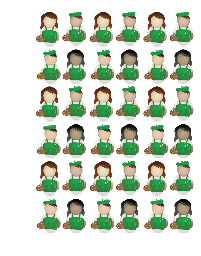

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

def imag_tile(img, n, m=1):
    """
    The image "img" will be repeated n times in 
    vertical and m times in horizontal direction.
    """

    if n == 1:
        tiled_img = img
    else:
        lst_imgs = []
        for i in range(n):
             lst_imgs.append(img)  
        tiled_img = np.concatenate(lst_imgs, axis=1 )
    if m > 1:
        lst_imgs = []
        for i in range(m):
             lst_imgs.append(tiled_img)  
        tiled_img = np.concatenate(lst_imgs, axis=0 )
          
    return tiled_img

basic_pattern = mpimg.imread('decorators_b2.png')

decorators_img = imag_tile(basic_pattern, 3, 3)

plt.axis("off")
plt.imshow(decorators_img)

Ein Bild ist ein Drei-Dimensionales numpy ndarray.

In [5]:
type(basic_pattern)

numpy.ndarray

Die ersten drei Zeilen unseres Bildes basic_pattern sehen folgendermaßen aus:

In [6]:
basic_pattern[:3]

array([[[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]]], dtype=float32)

Die innenliegendste Liste unseres Bildes beinhaltet die Pixel. Wir haben drei Werte die den R-, G- und B-Werten entsprechen. Wir haben also ein 24-bit PNG Bild. Für jeden RGB-Wert 8 bits.

PNG-Bilder können auch aus 32-bit Bildern bestehen (RGBA). Der vierte Wert "A" wird für die Transparenz benutzt (Ein-Kanal-Graustufen).

Es ist einfach auf individuelle Pixel anhand des Index zuzugreifen, z.B. in Zeile 100 und Spalte 20:

In [7]:
basic_pattern[100, 28]

array([ 0.90196079,  0.89019608,  0.86274511], dtype=float32)

Wie wir sehen, handelt es sich bei den Pixeln um Float-Werte (float32) zwischen 0 und 1. Matplotlib-Plotting kann sowohl mit float32 als auch unit8 für PNG-Bildern umgehen. Für alle anderen Bild-Formate wird nur unit8 unterstützt.

<br><br>

### Bilder zuschneiden

Mit der Slicing-Funktion können Teil-Bilder ausgeschnitten werden. Wir schneiden im folgenden Beispiel das Bild von (90, 50), d.h. Zeile 90 und Spalte 50, bis (50, 120): 

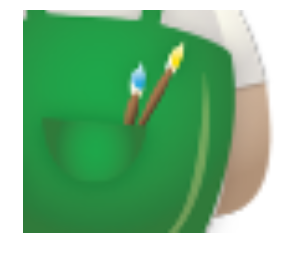

In [8]:
cropped = basic_pattern[90:150, 50:120]
plt.axis("off")
plt.imshow(cropped)

Wir brauchen diese Technik im folgenden.

Wir laden das [Bild eines at-Zeichens](./images/at_sign.png) im folgenden Skript:

<img width=50 src="images/at_sign.png" alt="at sign" />

Wir können die Slicing-Funktion um Teile aus einem Bild zu schneiden. Wir nutzen dies um sicherzustellen, dass beide Bilder die selbe Größe haben.

In [9]:
at_img=mpimg.imread('at_sign.png')

# at_img and decorators_img have to be of equal size:
d_shape = decorators_img.shape
at_shape = at_img.shape
height, width, colours = [min(x) for x in zip(*(d_shape, at_shape))]
at_img = at_img[0:height, 0:width]

<br><br>

### Schattieren eines Bildes

Wir definieren eine Funktion "shade" im folgenden Skript.
"shade" erwartet zwei Parameter. Der erste Parameter "imag" ist das Bild, welches schattiert werden soll. Der zweite Parameter ist der Schattierungs-Faktor. Dies kann ein Wert zwischen 0 und 1 sein. Wenn der Faktor auf 0 gesetzt wird, so wird das Bild nicht verändern. Wenn der Faktor auf 1 gesetzt wird, wird das Bild komplett geschwärzt.

[[[ 0.5  0.5  0.5]
  [ 0.5  0.5  0.5]
  [ 0.5  0.5  0.5]
  ..., 
  [ 0.5  0.5  0.5]
  [ 0.5  0.5  0.5]
  [ 0.5  0.5  0.5]]

 [[ 0.5  0.5  0.5]
  [ 0.5  0.5  0.5]
  [ 0.5  0.5  0.5]
  ..., 
  [ 0.5  0.5  0.5]
  [ 0.5  0.5  0.5]
  [ 0.5  0.5  0.5]]

 [[ 0.5  0.5  0.5]
  [ 0.5  0.5  0.5]
  [ 0.5  0.5  0.5]
  ..., 
  [ 0.5  0.5  0.5]
  [ 0.5  0.5  0.5]
  [ 0.5  0.5  0.5]]]


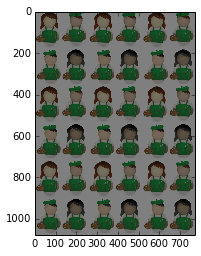

In [10]:
def shade(imag, percent):
    """
    imag: the image which will be shaded
    percent: a value between 0 (image will remain unchanged
             and 1 (image will be blackened)
    """
    tinted_imag = imag * (1 - percent)
    return tinted_imag

tinted_decorator_img = shade(decorators_img, 0.5)
plt.imshow(tinted_decorator_img)
print(tinted_decorator_img[:3])

<br><br>

### Überblendung von Bildern

#### Erstes Beispiel


Wir haben nun alles zusammen um ein überblendetes Bild zu erstellen. Unser "at"-Zeichen besteht aus schwarzen und weißen Pixeln. Das überblendete Bild ist folgendermaßen aufgebaut:
p=(n,m) sei ein beliebiges Pixel in der n-ten Zeile und der m-ten Spalte des at_img Bildes. Wenn der Wert des Pixels nicht schwarz oder dunkelgrau ist, verwenden wir das Pixel an der Position (n,m) des Bildes decorators_img. Andernfalls verwenden wir das entsprechende Pixel aus tinted_decorator_img. Die where-Funktion von numpy ist ideal für diese Aufgabe:

(1077, 771, 3) (1077, 771, 3) (1077, 771, 3)


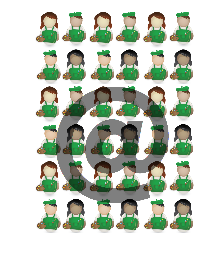

In [11]:
print(at_img.shape, 
      decorators_img.shape, 
      tinted_decorator_img.shape)
basic_pattern = mpimg.imread('decorators2.png')
img2 = np.where(at_img > [0.1, 0.1, 0.1], 
                decorators_img, 
                tinted_decorator_img)

plt.axis("off")
plt.imshow(img2)

Was noch zu tun ist, ist das neu erstellte Bild zu speichern:

In [12]:
mpimg.imsave('decorators_with_at.png', img2)

#### Zweites Beispiel

Jetzt wollen wir ein anderes Bild als "Wasserzeichen" verwenden. Anstatt des "at"-Zeichens, verwenden wir jetzt ein Direktoren-Stuhl. Wir erstellen jetzt das Bild, dass wir zu Beginn genannt haben.

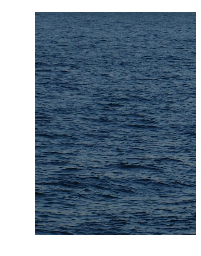

In [16]:
images = [mpimg.imread(fname) for fname in ["director_chair.png", "the_sea.png", "the_sky.png"]]
director_chair, sea, sky = images


plt.axis("off")
plt.imshow(sea)

In [ ]:
plt.axis("off")
plt.imshow(director_chair)

Im folgenden, überblenden wir die Bilder director_chair, decorators_img und sea indem wir nochmal die where-Funktion verwenden:

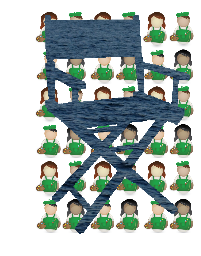

In [14]:
#sea2 = mpimg.imread('the_sea2.png')
img = np.where(director_chair > [0.9, 0.9, 0.9], 
               decorators_img, 
               sea)
plt.axis("off")
plt.imshow(img)
mpimg.imsave('decorators_with_chair', img)

Wir könnten statt mpimg.imread aus matplotlib auch Image.open aus PIL verwenden um die Bilder zu lesen. 
Es gibt einen entscheidenden Unterschied oder ein potentielles "Problem" zwischen den beiden Varianten:
Das Bild das von imread gelesen wird, hat Werte zwischen 0 und 1. Dagegen hat liefert Image.open Werte zwischen 0 und 255. Somit müssen wir alle Werte durch 255 dividieren, wenn  wir mit einem Bild arbeiten müssen, dass mit mpimg.imread gelesen wurde:

[27 27 27]


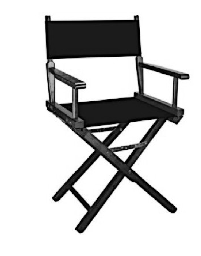

In [21]:
from PIL import Image


img = Image.open("director_chair.jpg")
img = img.resize((at_img.shape[1], at_img.shape[0]))
img = np.asarray(img)


plt.axis("off")
plt.imshow(img)

print(img[100, 129])


In [24]:
# PIL: Pixel are within range 0 and 255
# mpimg: range 0 bis 1

img = np.asarray(img, np.float)
img = img / 255  

print(img[100, 129])


[ 0.00041522  0.00041522  0.00041522]
